In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('exams.csv', encoding='utf8')
df.head() #取得DATASET
passmark = 60 #設定即個分數為60分

df.isnull().sum() #確認無空值

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
del df['gender']
del df['race/ethnicity']
df.head() #移除不需要的欄位

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,some high school,free/reduced,completed,71,69,67
1,bachelor's degree,standard,none,59,72,76
2,high school,standard,none,63,61,64
3,bachelor's degree,free/reduced,none,50,55,52
4,master's degree,standard,none,85,95,97


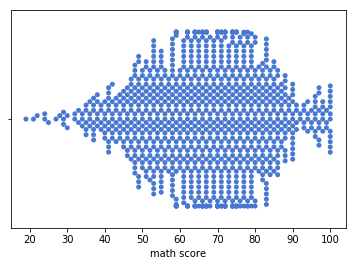

In [5]:
sns.swarmplot(x="math score", data = df, palette="muted")
plt.show()

In [6]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts() #找出數學及格人數

P    684
F    316
Name: Math_PassStatus, dtype: int64

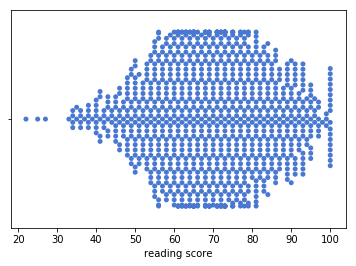

In [7]:
sns.swarmplot(x="reading score", data = df, palette="muted")
plt.show()

In [8]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts() #找出閱讀及格人數

P    750
F    250
Name: Reading_PassStatus, dtype: int64

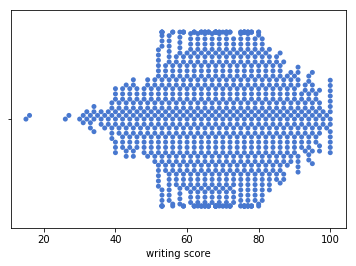

In [9]:
sns.swarmplot(x="writing score", data = df, palette="muted")
plt.show()

In [10]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts() #找出寫作及格人數

P    711
F    289
Name: Writing_PassStatus, dtype: int64

In [11]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts() #找出全部測驗及格人數

P    597
F    403
Name: OverAll_PassStatus, dtype: int64

In [12]:
del df['Math_PassStatus']
del df['Reading_PassStatus']
del df['Writing_PassStatus']
df.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score,OverAll_PassStatus
0,some high school,free/reduced,completed,71,69,67,P
1,bachelor's degree,standard,none,59,72,76,F
2,high school,standard,none,63,61,64,P
3,bachelor's degree,free/reduced,none,50,55,52,F
4,master's degree,standard,none,85,95,97,P


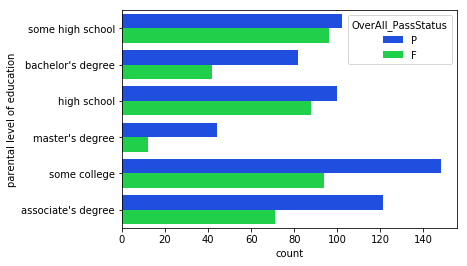

In [13]:
sns.countplot(y='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
plt.show() #父母教育程度與成績的相關性

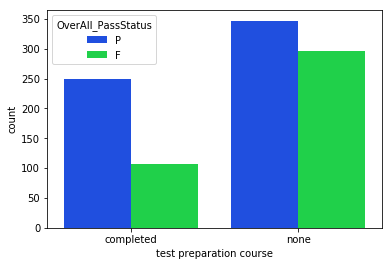

In [14]:
sns.countplot(x='test preparation course', data = df, hue='OverAll_PassStatus', palette='bright')
plt.show() #參與考試前準備課程與成績的相關性

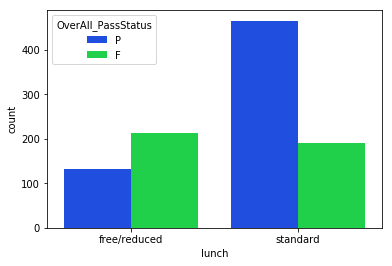

In [15]:
sns.countplot(x='lunch', data = df, hue='OverAll_PassStatus', palette='bright')
plt.show() #家庭經濟與成績的相關性

In [18]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3 #算出平均成績

In [19]:
df.groupby('parental level of education').mean() #父母教育程度影響

,math score,reading score,writing score,Total_Marks,Percentage
parental level of education,,,,,
associate's degree,69.437500,71.385417,70.354167,211.177083,70.392361
bachelor's degree,69.354839,73.540323,73.677419,216.572581,72.190860
high school,64.308511,67.101064,64.739362,196.148936,65.382979
master's degree,73.035714,76.339286,77.000000,226.375000,75.458333
some college,66.673554,69.425620,68.719008,204.818182,68.272727
some high school,63.121212,65.868687,64.060606,193.050505,64.350168


In [20]:
df.groupby('lunch').mean() #家中經濟影響

,math score,reading score,writing score,Total_Marks,Percentage
lunch,,,,,
free/reduced,57.921739,62.646377,60.756522,181.324638,60.441546
standard,71.392366,73.198473,72.488550,217.079389,72.359796


In [21]:
df.groupby('test preparation course').mean() #練習題影響

,math score,reading score,writing score,Total_Marks,Percentage
test preparation course,,,,,
completed,69.324930,73.196078,73.803922,216.324930,72.108310
none,65.312597,67.538103,65.463453,198.314152,66.104717


In [22]:
textToInt = {'some high school':1,'high school':2,'some college':3,"associate's degree":4,"bachelor's degree":5,"master's degree":6} # 字典(dict)結構
df['edu level'] = df['parental level of education'].map(textToInt)
changeToInt = {'completed':1,'none':0}
df['prepared']=df['test preparation course'].map(changeToInt)
getPass = {'P':1,'F':0}
df['Pass']=df['OverAll_PassStatus'].map(getPass)
df.head() #程度量化

,parental level of education,lunch,test preparation course,math score,reading score,writing score,OverAll_PassStatus,Total_Marks,Percentage,edu level,prepared,Pass
0,some high school,free/reduced,completed,71,69,67,P,207,69.000000,1,1,1
1,bachelor's degree,standard,none,59,72,76,F,207,69.000000,5,0,0
2,high school,standard,none,63,61,64,P,188,62.666667,2,0,1
3,bachelor's degree,free/reduced,none,50,55,52,F,157,52.333333,5,0,0
4,master's degree,standard,none,85,95,97,P,277,92.333333,6,0,1


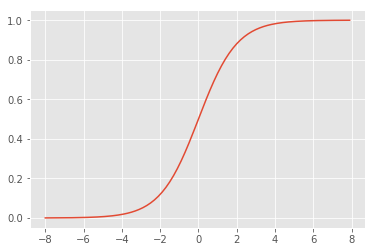

In [23]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

plt.style.use('ggplot')
%matplotlib inline

z = np.arange(-8,8,0.1)
y = sigmoid(z)
plt.plot(z,y)
plt.show()

In [24]:
from sklearn.cross_validation import train_test_split
X = df[['edu level','prepared']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_train.head()

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,edu level,prepared
448,2,1
151,1,0
926,4,1
288,5,1
865,1,1


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_nor = sc.transform(X_train)
X_test_nor = sc.transform(X_test)
X_train_nor[:10]

array([[-0.69254064,  1.31291104],
       [-1.36771953, -0.76166623],
       [ 0.65781715,  1.31291104],
       [ 1.33299604,  1.31291104],
       [-1.36771953,  1.31291104],
       [-0.01736174,  1.31291104],
       [-0.69254064,  1.31291104],
       [ 0.65781715, -0.76166623],
       [-0.69254064, -0.76166623],
       [ 0.65781715,  1.31291104]])

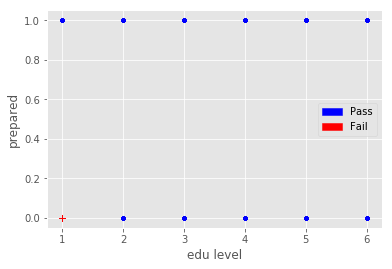

In [26]:
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches

lr = LogisticRegression()
lr.fit(X_train_nor, y_train)
pred_y = lr.predict(X_train_nor)

for i in range(len(X_train_nor)):
    if(lr.predict(X_train_nor[i].reshape(1,-1))==1):
        plt.plot(X_train['edu level'].reset_index(drop=True)[i],X_train['prepared'].reset_index(drop=True)[i],'b.')
    else:
        plt.plot(X_train['edu level'].reset_index(drop=True)[i],X_train['prepared'].reset_index(drop=True)[i],'r+')
        
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='Pass')
red_patch = mpatches.Patch(color='red', label='Fail')
plt.legend(handles=[blue_patch,red_patch])        
plt.xlabel("edu level")
plt.ylabel("prepared")
plt.show()

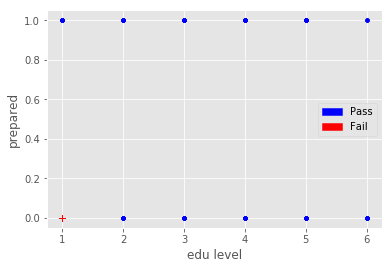

In [27]:
for i in range(len(X_test_nor)):
    if(lr.predict(X_train_nor[i].reshape(1,-1))==1):
        plt.plot(X_train['edu level'].reset_index(drop=True)[i],X_train['prepared'].reset_index(drop=True)[i],'b.')
    else:
        plt.plot(X_train['edu level'].reset_index(drop=True)[i],X_train['prepared'].reset_index(drop=True)[i],'r+')
        
    
# 標註（補丁patch）
blue_patch = mpatches.Patch(color='blue', label='Pass')
red_patch = mpatches.Patch(color='red', label='Fail')
plt.legend(handles=[blue_patch,red_patch])        
plt.xlabel("edu level")
plt.ylabel("prepared")
plt.show()


In [28]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, lr.predict(X_test_nor))
print (cnf_matrix)

[[ 24 117]
 [ 17 142]]


In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix, without normalization
[[ 24 117]
 [ 17 142]]


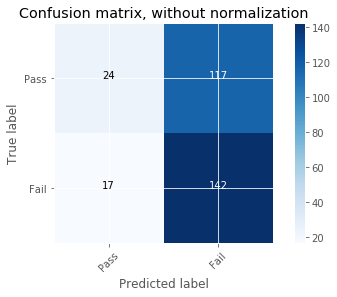

In [30]:
import itertools
target_names = ['Pass', 'Fail']
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix, without normalization')

plt.show()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test_nor), target_names=target_names))

             precision    recall  f1-score   support

       Pass       0.59      0.17      0.26       141
       Fail       0.55      0.89      0.68       159

avg / total       0.57      0.55      0.48       300



In [35]:
y_pred = lr.predict(X_test)
results = []
for pl, tl, idx in zip(y_pred, y_test, y_test.index):
    if pl == tl:
        results.append([idx, pl, tl, 1])
    else:
        results.append([idx, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', 'predicted', 'actual', 'correct'])
rf

,index,predicted,actual,correct
0,427,1,1,1
1,649,1,1,1
2,93,1,1,1
3,186,1,1,1
4,504,1,0,0
5,322,1,1,1
6,27,1,1,1
7,795,1,1,1
8,787,1,0,0
9,796,1,1,1


In [36]:
rf['correct'].sum()/300 

0.53